<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/lecturadedatosabiertoscmszmumu-Carrazko/blob/main/CMSOpenDataZtoMuMu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **✦✦✦Partículas Datos✦✦✦**

Alejandro Hernández Carrasco, 23 de Junio de 2025

## 0.- Carga de Datos

In [5]:
import pandas as pd #panda nos permite manipular el archivo csv https://pandas.pydata.org
import numpy as np #numpy nos permite hacer operaciones usando vectores https://numpy.org
import matplotlib.pyplot as plt
%matplotlib inline

#plotly nos permite crear graficas interactivas https://plotly.com/python/ (NO LO USÉ)
#import plotly.express as px
#import plotly.graph_objects as go

#Ponemos el .csv en un DataFrame
 #usamos la liga que está directamente en la página.
particles = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',')

## 1.- Información Inmediata

Acerca de los Datos

In [6]:
#Vista de nustros datos
particles

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,173692,1245050481,8.9721,-1.6158,-2.7176,1,-0.0294,8.7183,13.5266,1.8709,2.7911,1,-0.0689,0.4202
9996,173692,1244979327,39.4543,-1.1310,-2.0568,1,0.0417,0.0000,47.7209,-0.1834,1.7965,-1,-0.0794,0.0000
9997,173692,1245305163,40.6034,-1.5051,-1.6758,-1,0.0635,0.2012,44.4382,-1.0010,1.5380,1,-0.0671,1.1499
9998,173692,1245041468,37.2853,1.0024,-2.1486,1,0.0361,0.0000,41.0945,-0.1200,0.8850,-1,-0.0291,0.0000


In [7]:
#Información de cada columna de datos
particles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     10000 non-null  int64  
 1   Event   10000 non-null  int64  
 2   pt1     10000 non-null  float64
 3   eta1    10000 non-null  float64
 4   phi1    10000 non-null  float64
 5   Q1      10000 non-null  int64  
 6   dxy1    10000 non-null  float64
 7   iso1    10000 non-null  float64
 8   pt2     10000 non-null  float64
 9   eta2    10000 non-null  float64
 10  phi2    10000 non-null  float64
 11  Q2      10000 non-null  int64  
 12  dxy2    10000 non-null  float64
 13  iso2    10000 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 1.1 MB


In [8]:
#Descripción de cada columna
particles.describe()

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,168783.06370,4.019532e+08,38.403231,-0.278699,-0.23353,-0.031200,0.006345,1.514267,38.639360,0.079500,0.250883,0.038400,0.01058,1.732420
std,3929.76919,3.492634e+08,14.427817,1.352768,1.80456,0.999563,0.074693,6.353057,15.945227,0.871556,1.787396,0.999312,1.78079,6.812311
min,160957.00000,8.922000e+04,3.463700,-2.437500,-3.14140,-1.000000,-3.588000,0.000000,3.266200,-2.428000,-3.141500,-1.000000,-2.00520,0.000000
25%,166033.00000,1.250350e+08,30.160275,-1.429850,-1.77995,-1.000000,-0.051500,0.000000,30.033800,-0.566525,-1.258575,-1.000000,-0.06740,0.000000
50%,167102.00000,3.206396e+08,38.883850,-0.557000,-0.42945,-1.000000,0.012100,0.000000,38.932350,0.076450,0.406600,1.000000,-0.01315,0.000000
75%,173381.00000,5.666747e+08,45.057750,1.094800,1.30270,1.000000,0.066500,0.478550,45.194675,0.738500,1.803625,1.000000,0.05290,0.527525
max,173692.00000,1.245305e+09,269.080000,2.099700,3.14140,1.000000,2.027700,184.728000,528.434000,2.099200,3.140900,1.000000,177.93100,151.295000


Información respecto a la Carga de cada Partícula

In [9]:
#Cargas de la partícula 1
particles['Q1'].value_counts()

,count
Q1,
-1,5156
1,4844


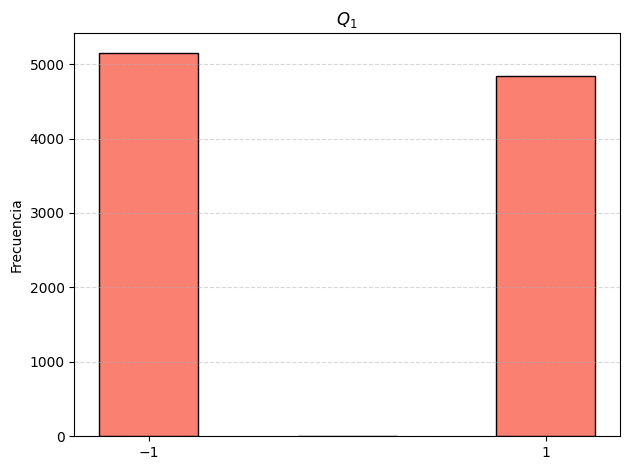

In [10]:
# Hacer histograma de Q1
plt.hist(particles['Q1'], bins=[-1.5, -0.5, 0.5, 1.5], align='mid', rwidth=0.5, color='salmon', edgecolor='black')
plt.title(r'$Q_1$')
plt.ylabel('Frecuencia')
plt.xticks([-1, 1])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

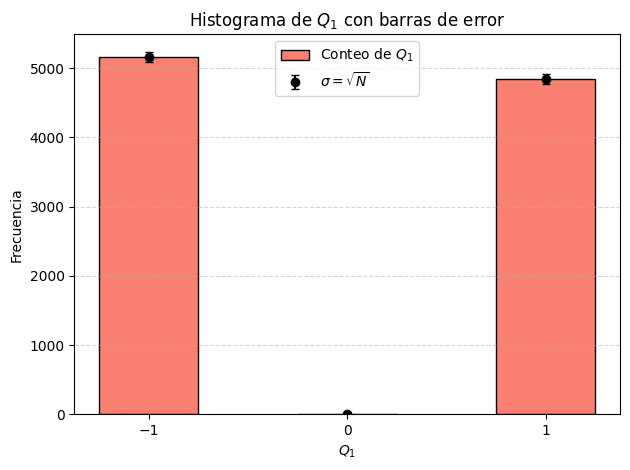

In [11]:
# Bins definidos manualmente para partículas con Q = -1, 0, +1
bins = [-1.5, -0.5, 0.5, 1.5]

# 1. Calcular histograma
counts, _ = np.histogram(particles['Q1'], bins=bins)

# 2. Calcular centros de bin y errores
bin_centers = 0.5 * (np.array(bins[1:]) + np.array(bins[:-1]))
errors = np.sqrt(counts)

# 3. Graficar histograma
plt.hist(particles['Q1'], bins=bins, align='mid', rwidth=0.5,
         color='salmon', edgecolor='black', label='Conteo de $Q_1$')

# 4. Añadir barras de error centradas
plt.errorbar(bin_centers, counts, yerr=errors, fmt='o',
             color='black', capsize=3, label=r'$\sigma = \sqrt{N}$')

# 5. Estética
plt.title(r'Histograma de $Q_1$ con barras de error')
plt.ylabel('Frecuencia')
plt.xlabel(r'$Q_1$')
plt.xticks([-1, 0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
#Cargas de la partícula 2
particles['Q2'].value_counts()

,count
Q2,
1,5192
-1,4808


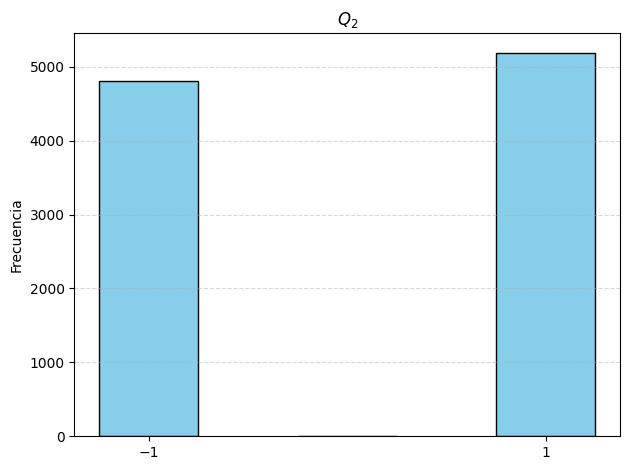

In [13]:
# Hacer histograma de Q2
plt.hist(particles['Q2'], bins=[-1.5, -0.5, 0.5, 1.5], align='mid', rwidth=0.5, color='skyblue', edgecolor='black')
plt.title(r'$Q_2$')
plt.ylabel('Frecuencia')
plt.xticks([-1, 1])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

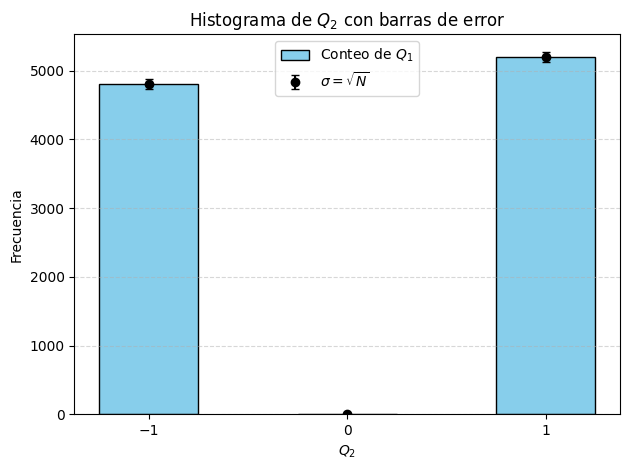

In [14]:
# Bins definidos manualmente para partículas con Q = -1, 0, +1
bins = [-1.5, -0.5, 0.5, 1.5]

# 1. Calcular histograma
counts, _ = np.histogram(particles['Q2'], bins=bins)

# 2. Calcular centros de bin y errores
bin_centers = 0.5 * (np.array(bins[1:]) + np.array(bins[:-1]))
errors = np.sqrt(counts)

# 3. Graficar histograma
plt.hist(particles['Q2'], bins=bins, align='mid', rwidth=0.5,
         color='skyblue', edgecolor='black', label='Conteo de $Q_1$')

# 4. Añadir barras de error centradas
plt.errorbar(bin_centers, counts, yerr=errors, fmt='o',
             color='black', capsize=3, label=r'$\sigma = \sqrt{N}$')

# 5. Estética
plt.title(r'Histograma de $Q_2$ con barras de error')
plt.ylabel('Frecuencia')
plt.xlabel(r'$Q_2$')
plt.xticks([-1, 0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Información acerca del pt de cada partícula

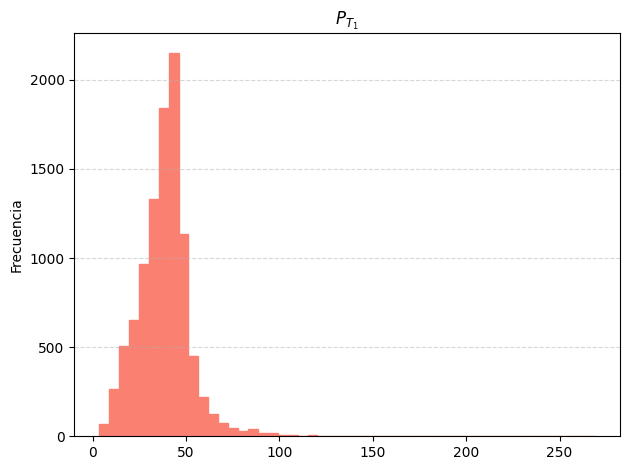

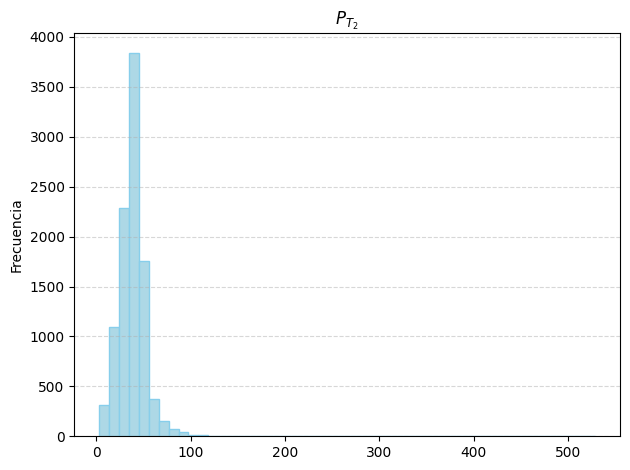

In [15]:
# Hacer histograma de pt1
plt.hist(particles['pt1'], bins = 50, align='mid', color='salmon', edgecolor='salmon')
plt.title(r'$P_{T_1}$')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Hacer histograma de pt2
plt.hist(particles['pt2'], bins = 50, align='mid', color='lightblue', edgecolor='skyblue')
plt.title(r'$P_{T_2}$')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

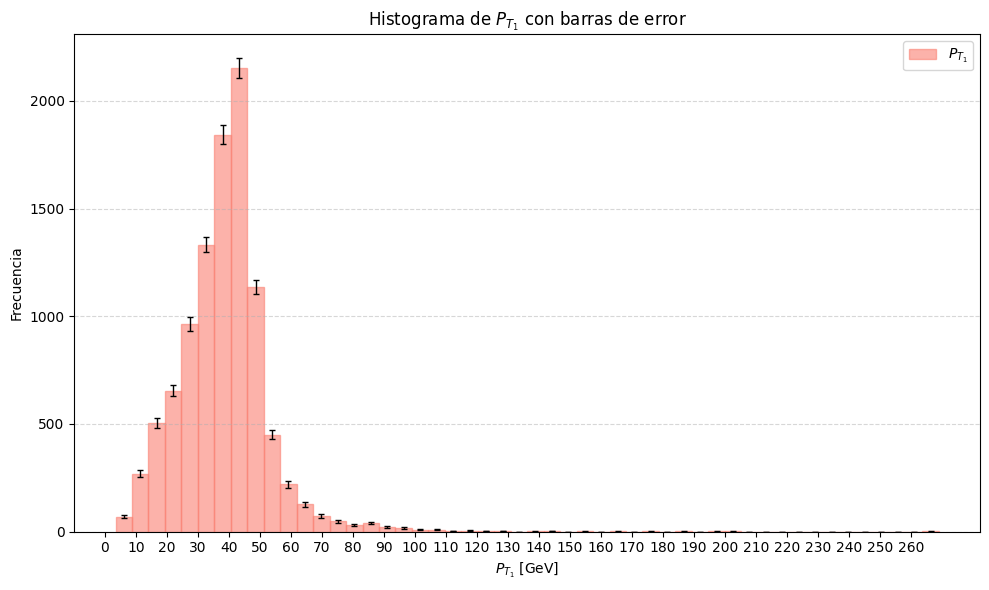

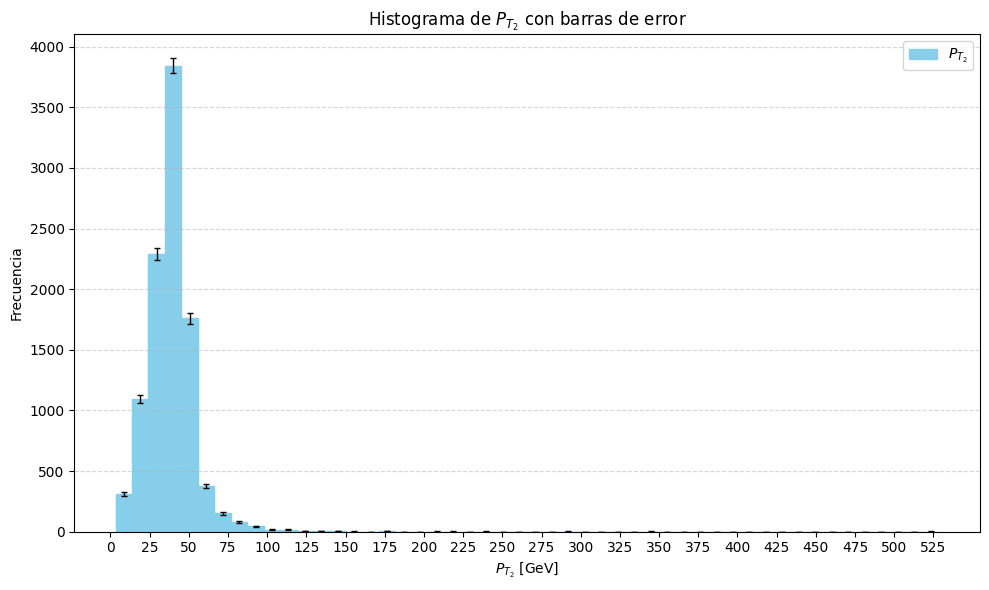

In [16]:
# 1. Definir número de bins y calcular histograma
bins = 50
counts, bin_edges = np.histogram(particles['pt1'], bins=bins)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
errors = np.sqrt(counts)

# 2. Graficar histograma con barras de error
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=(bin_edges[1] - bin_edges[0]),
        color='salmon', edgecolor='salmon', alpha=0.6, label=r'$P_{T_1}$')
plt.errorbar(bin_centers, counts, yerr=errors, fmt='none',
             ecolor='black', capsize=2, linewidth=1)

# 3. Estética
plt.title(r'Histograma de $P_{T_1}$ con barras de error')
plt.xlabel(r'$P_{T_1}$ [GeV]')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(list(range(0, 270, 10)))
plt.tight_layout()
plt.legend()
plt.show()
###########################################################
# 1. Definir número de bins y calcular histograma
bins = 50
counts, bin_edges = np.histogram(particles['pt2'], bins=bins)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
errors = np.sqrt(counts)

# 2. Graficar histograma con barras de error
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=(bin_edges[1] - bin_edges[0]),
        color='skyblue', edgecolor='skyblue', label=r'$P_{T_2}$')
plt.errorbar(bin_centers, counts, yerr=errors, fmt='none',
             ecolor='black', capsize=2, linewidth=1)

# 3. Estética
plt.title(r'Histograma de $P_{T_2}$ con barras de error')
plt.xlabel(r'$P_{T_2}$ [GeV]')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(list(range(0, 550, 25)))
plt.tight_layout()
plt.legend()
plt.show()



Información acerca del iso de cada partícula

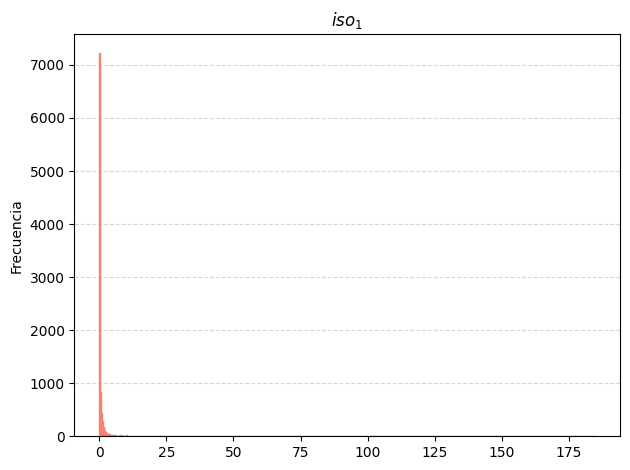

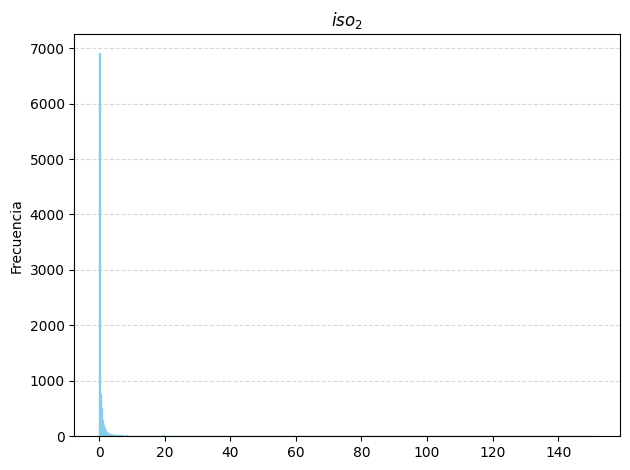

In [17]:
# Hacer histograma de pt1
plt.hist(particles['iso1'], bins = 500, align='mid', color='salmon', edgecolor='salmon')
plt.title(r'$iso_1$')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Hacer histograma de pt2
plt.hist(particles['iso2'], bins = 500, align='mid', color='lightblue', edgecolor='skyblue')
plt.title(r'$iso_2$')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

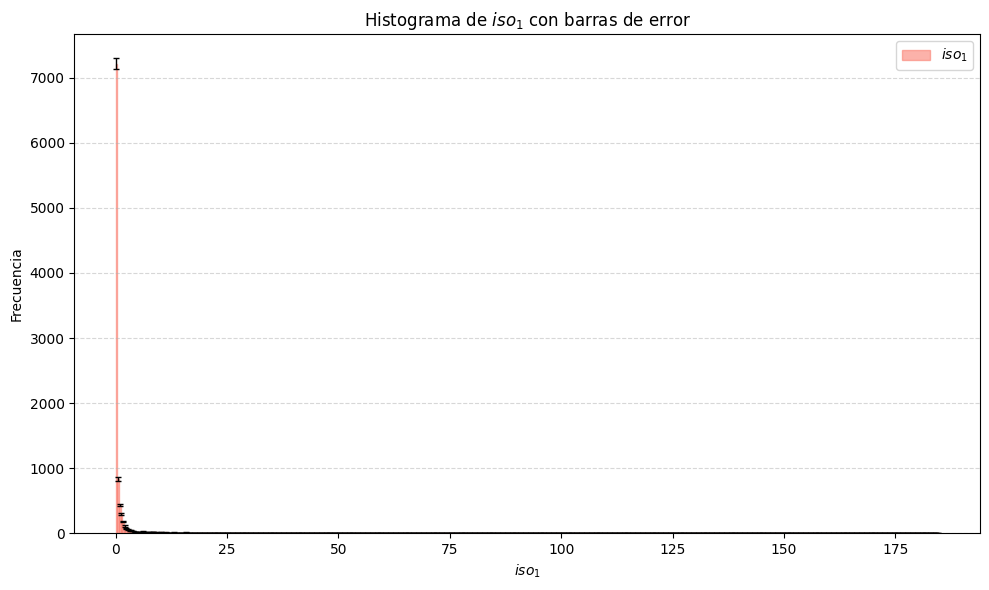

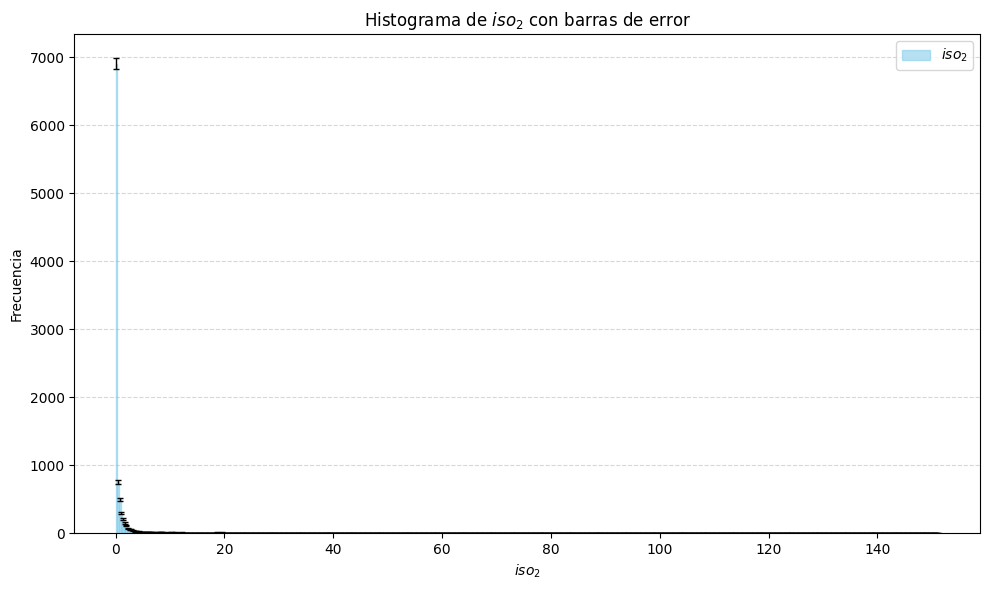

In [18]:
# 1. Calcular histograma de iso1
bins = 500
counts, bin_edges = np.histogram(particles['iso1'], bins=bins)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
errors = np.sqrt(counts)

# 2. Graficar con barras de error
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=(bin_edges[1] - bin_edges[0]),
        color='salmon', edgecolor='salmon', alpha=0.6, label=r'$iso_1$')
plt.errorbar(bin_centers, counts, yerr=errors, fmt='none',
             ecolor='black', capsize=2, linewidth=1)

# 3. Estética
plt.title(r'Histograma de $iso_1$ con barras de error')
plt.xlabel(r'$iso_1$')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

##########################################
# 1. Calcular histograma de iso1
bins = 500
counts, bin_edges = np.histogram(particles['iso2'], bins=bins)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
errors = np.sqrt(counts)

# 2. Graficar con barras de error
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=(bin_edges[1] - bin_edges[0]),
        color='skyblue', edgecolor='skyblue', alpha=0.6, label=r'$iso_2$')
plt.errorbar(bin_centers, counts, yerr=errors, fmt='none',
             ecolor='black', capsize=2, linewidth=1)

# 3. Estética
plt.title(r'Histograma de $iso_2$ con barras de error')
plt.xlabel(r'$iso_2$')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()


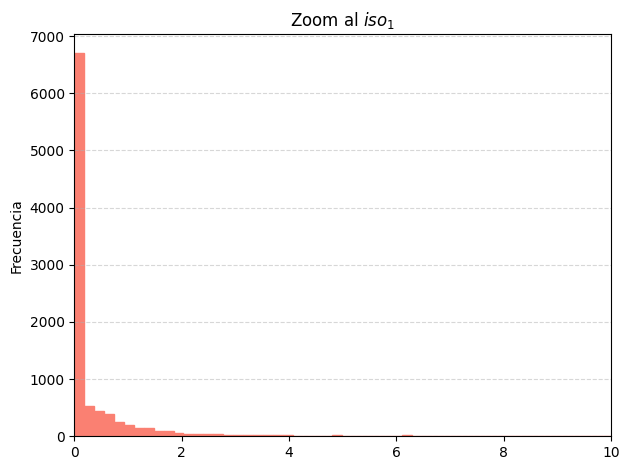

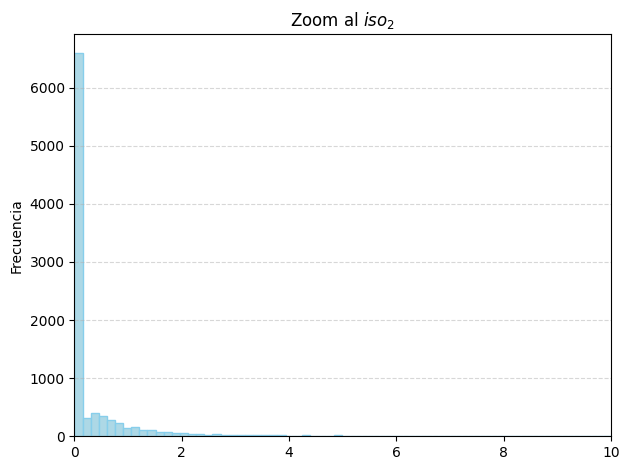

In [19]:
#Más de cerca

# iso1
plt.hist(particles['iso1'], bins = 1000, align='mid', color='salmon', edgecolor='salmon')
plt.title(r'Zoom al $iso_1$')
plt.ylabel('Frecuencia')
plt.xlim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# iso2
plt.hist(particles['iso2'], bins = 1000, align='mid', color='lightblue', edgecolor='skyblue')
plt.title(r'Zoom al $iso_2$')
plt.ylabel('Frecuencia')
plt.xlim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

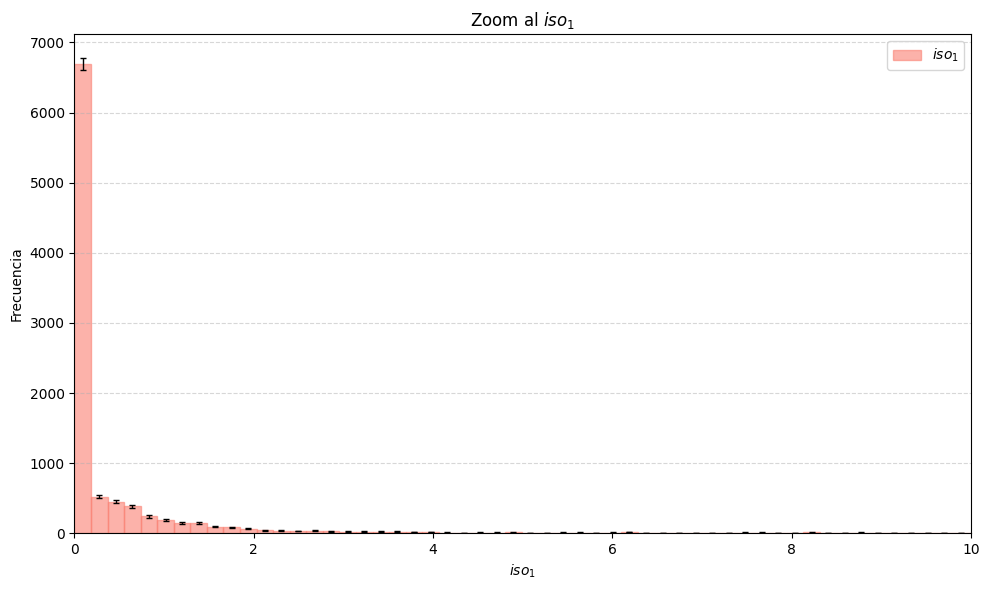

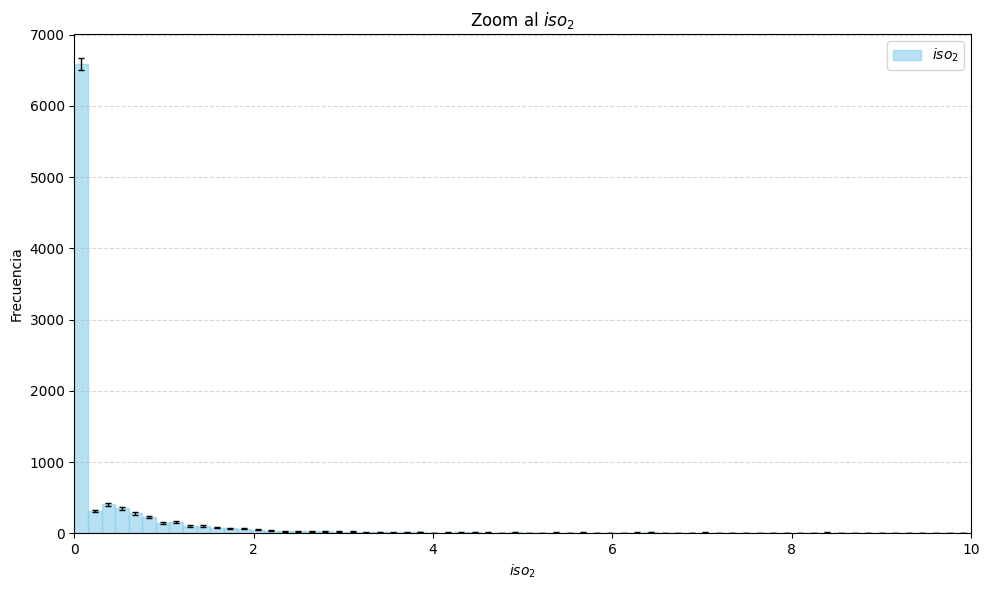

In [20]:
#Más de cerca

#pt1
bins = 1000
counts, bin_edges = np.histogram(particles['iso1'], bins=bins)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
errors = np.sqrt(counts)

plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=(bin_edges[1] - bin_edges[0]),
        color='salmon', edgecolor='salmon', alpha=0.6, label=r'$iso_1$')
plt.errorbar(bin_centers, counts, yerr=errors, fmt='none',
             ecolor='black', capsize=2, linewidth=1)

plt.title(r'Zoom al $iso_1$')
plt.ylabel('Frecuencia')
plt.xlabel(r'$iso_1$')
plt.xlim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()

# Histograma y barras de error para iso2 con zoom

bins = 1000
counts, bin_edges = np.histogram(particles['iso2'], bins=bins)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
errors = np.sqrt(counts)

plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=(bin_edges[1] - bin_edges[0]),
        color='skyblue', edgecolor='skyblue', alpha=0.6, label=r'$iso_2$')
plt.errorbar(bin_centers, counts, yerr=errors, fmt='none',
             ecolor='black', capsize=2, linewidth=1)

plt.title(r'Zoom al $iso_2$')
plt.ylabel('Frecuencia')
plt.xlabel(r'$iso_2$')
plt.xlim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()


Información acerca del Parámetro de impacto

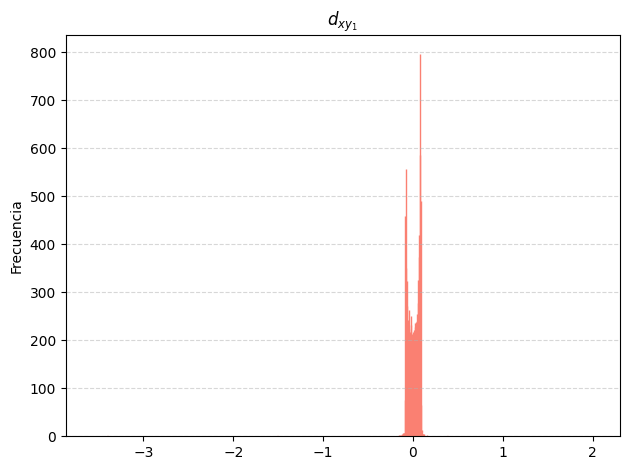

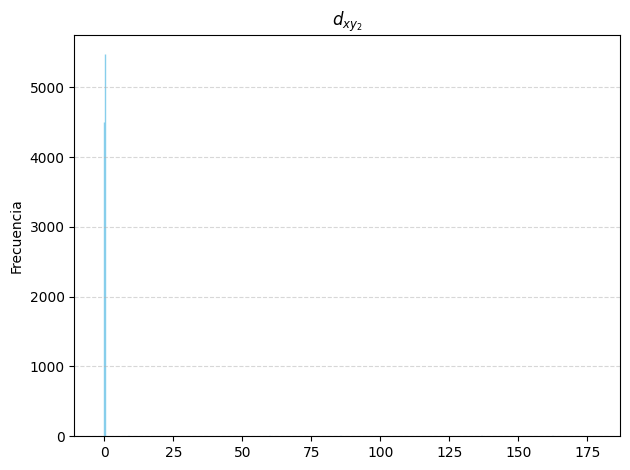

In [21]:
# Hacer histograma de dxy1
plt.hist(particles['dxy1'], bins=1000, align='mid', rwidth=0.01, color='salmon', edgecolor='salmon')
plt.title(r'$d_{xy_1}$')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Hacer histograma de dxy2
plt.hist(particles['dxy2'], align='mid', bins=1000, rwidth=0.01,  color='lightblue', edgecolor='skyblue')
plt.title(r'$d_{xy_2}$')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

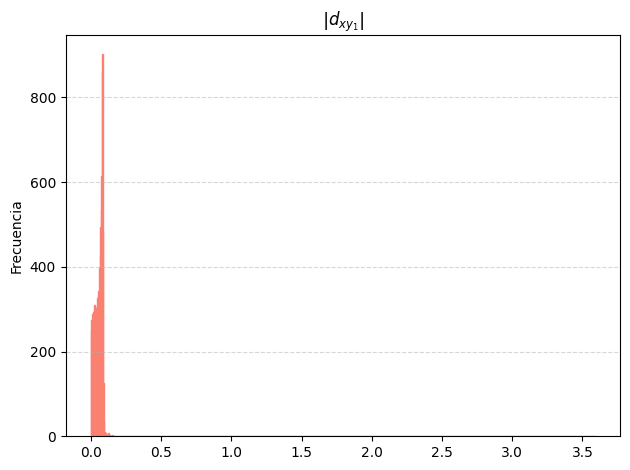

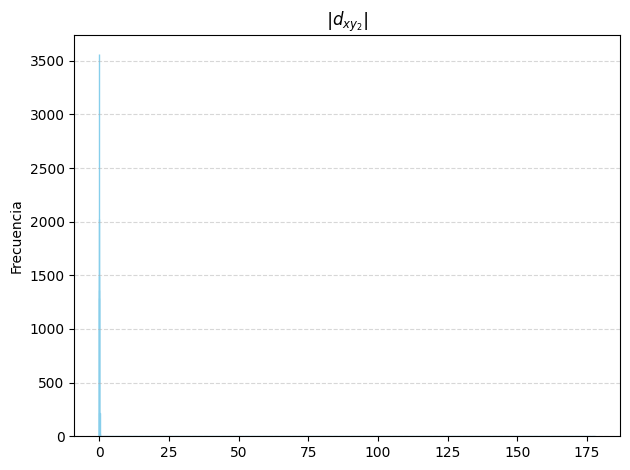

In [22]:
# Hacer histograma de pt1
plt.hist((particles['dxy1']).abs(), bins=1000, align='mid', color='salmon', edgecolor='salmon')
plt.title(r'$\left| d_{xy_1}\right|$')
plt.ylabel('Frecuencia')
#plt.xlim(0, 0.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Hacer histograma de pt2
plt.hist((particles['dxy2']).abs(), align='mid', bins=10000,  color='lightblue', edgecolor='skyblue')
plt.title(r'$\left| d_{xy_2}\right|$')
plt.ylabel('Frecuencia')
#plt.xlim(0, 0.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

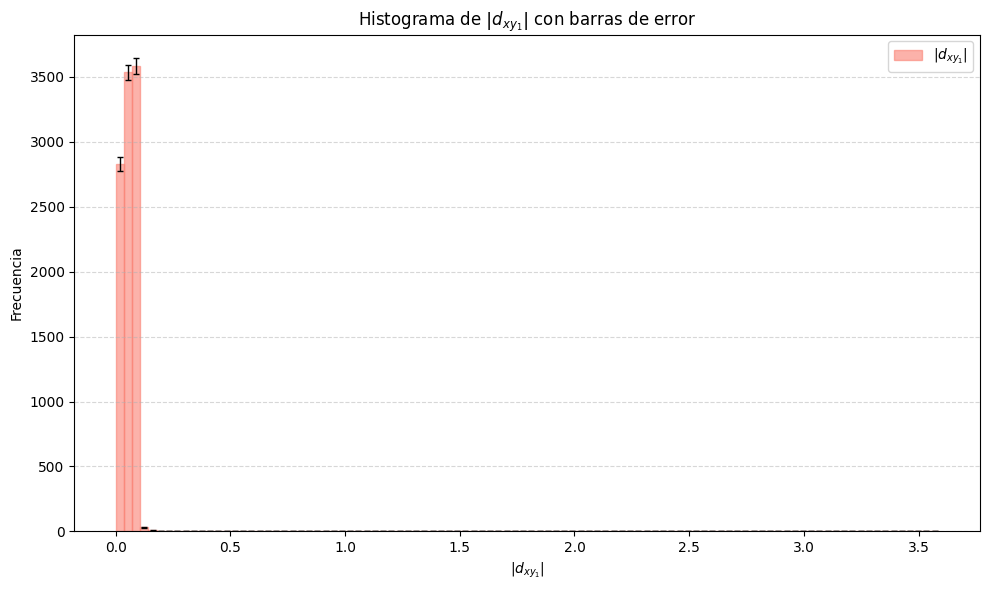

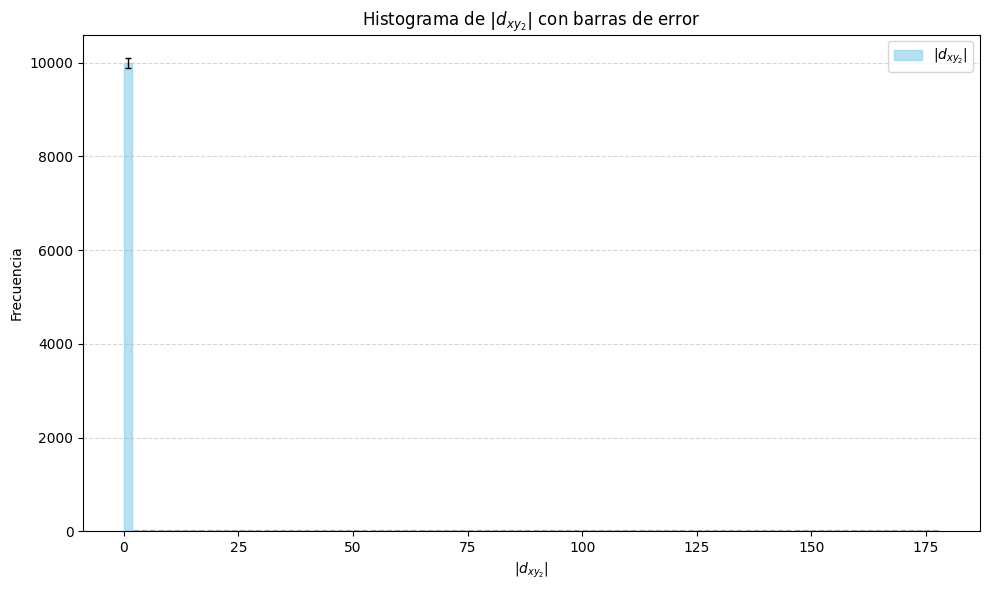

In [23]:
# 1. Calcular histograma de |dxy1|
data = (particles['dxy1']).abs()
bins = 100
counts, bin_edges = np.histogram(data, bins=bins)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
errors = np.sqrt(counts)

# 2. Graficar histograma con barras de error
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=(bin_edges[1] - bin_edges[0]),
        color='salmon', edgecolor='salmon', alpha=0.6, label=r'$|d_{xy_1}|$')
plt.errorbar(bin_centers, counts, yerr=errors, fmt='none',
             ecolor='black', capsize=2, linewidth=1)

# 3. Estética
plt.title(r'Histograma de $\left| d_{xy_1} \right|$ con barras de error')
plt.ylabel('Frecuencia')
plt.xlabel(r'$|d_{xy_1}|$')
# plt.xlim(0, 0.1)  # Descomenta si deseas hacer zoom en la región más relevante
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# 1. Calcular histograma de |dxy2|
data = (particles['dxy2']).abs()
bins = 100
counts, bin_edges = np.histogram(data, bins=bins)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
errors = np.sqrt(counts)

# 2. Graficar histograma con barras de error
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=(bin_edges[1] - bin_edges[0]),
        color='skyblue', edgecolor='skyblue', alpha=0.6, label=r'$|d_{xy_2}|$')
plt.errorbar(bin_centers, counts, yerr=errors, fmt='none',
             ecolor='black', capsize=2, linewidth=1)

# 3. Estética
plt.title(r'Histograma de $\left| d_{xy_2} \right|$ con barras de error')
plt.ylabel('Frecuencia')
plt.xlabel(r'$|d_{xy_2}|$')
# plt.xlim(0, 0.1)  # Descomenta si deseas hacer zoom en la región más relevante
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()



## 3.- Filtrado de Datos

Sabemos que hay muchos aspectos a considerar antes de calcular la Masa Invariante de todos los datos, los filtrados que usaremos serán:

1.- Filtrado por el Desplazamiento ($d_{xy}$)

2.- Filtrado por Aislamiento ($iso$)

3.- Filtrado por Carga Total ($Q_T$)

_____________________________________________________________________

**3.1.- Filtrado de Desplazamiento**

Sabemos que el $d_{xy}$ se refiere a la distancia respecto al vertice de colisión, si ésta distancia es demasiado grande entonces puede ser debido a muchas razones como por ejemplo, que la partícula sea producto de otro evento ajeno al que estamos analizando, el criterio que usaremos será que nos quedaremos con los datos tales que

$\left| d_{xy_i} \right| < 0.2 \hspace{2mm} mm$

In [24]:
#%reset df

In [25]:
# Nuevo dataframe para no trabajar sobre los datos originales, además de que ya tiene el primer filtro
df = particles[(particles['dxy1'].abs() < 0.2) & (particles['dxy2'].abs() < 0.2) ]

df[['Run', 'Event', 'dxy1', 'dxy2']]

,Run,Event,dxy1,dxy2
0,165617,74969122,-0.0745,0.0712
1,165617,75138253,-0.0554,0.0515
2,165617,75887636,0.0879,-0.0876
3,165617,75779415,0.0585,-0.0492
4,165617,75098104,-0.0305,0.0442
...,...,...,...,...
9995,173692,1245050481,-0.0294,-0.0689
9996,173692,1244979327,0.0417,-0.0794
9997,173692,1245305163,0.0635,-0.0671
9998,173692,1245041468,0.0361,-0.0291


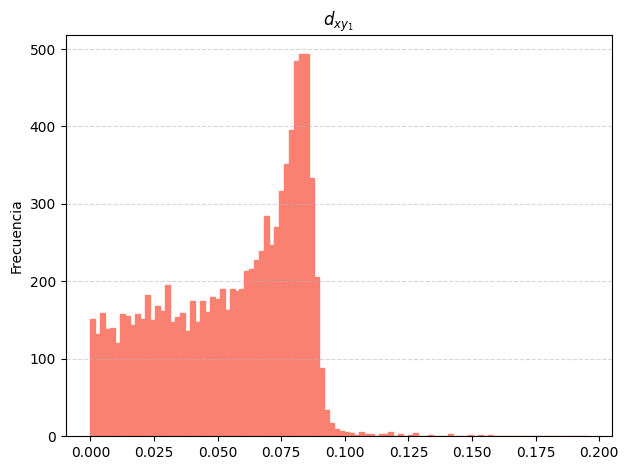

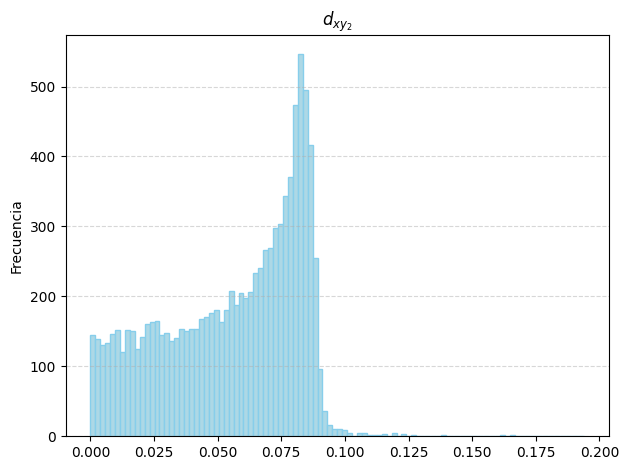

In [26]:
# Hacer histograma de pt1
plt.hist(df['dxy1'].abs(), bins=100, align='mid', color='salmon', edgecolor='salmon')
plt.title(r'$d_{xy_1}$')
plt.ylabel('Frecuencia')
#plt.xlim([-0.2, 0.2])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Hacer histograma de pt2
plt.hist(df['dxy2'].abs(), align='mid', bins=100,  color='lightblue', edgecolor='skyblue')
plt.title(r'$d_{xy_2}$')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**3.2 Filtrado por Aislamiento**

Los datos que estamos manejando contempla el aislamiento como la suma de los aislamientos en el ltrack, lecal y lhcal. Asi pues, como el $p_T$ de cada muón es diferente, entonces optaremos en analizar cuánto "porcentaje" de la energía del muón viene de otros hadrones. Entones haremos la siguiente cuenta


$iso_n = iso / p_T$


Y consideraremos que hablamos propiamente de un muón (y no un de Jett) cuando $iso_n < 0.15$.

In [27]:
# Creamos las columnas para nuestro nuevo iso
df['iso1_n'] = df['iso1'] / df['pt1']
df['iso2_n'] = df['iso2'] / df['pt2']

# Hacemos la selección o filtrado
df = df[ (df['iso1_n']< 0.15) & (df['iso2_n']< 0.15) ]

/tmp/ipython-input-27-4068894157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['iso1_n'] = df['iso1'] / df['pt1']
/tmp/ipython-input-27-4068894157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['iso2_n'] = df['iso2'] / df['pt2']


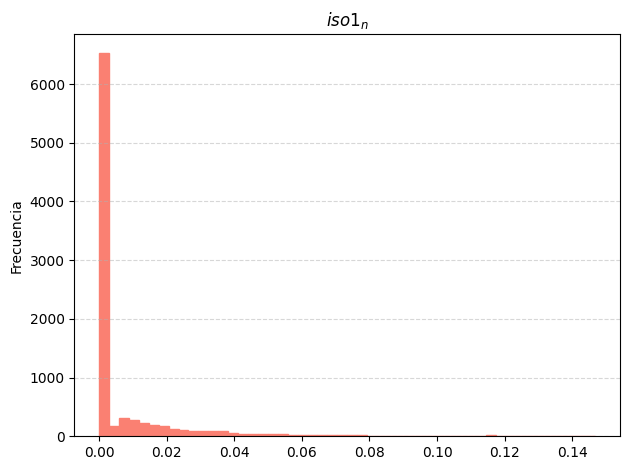

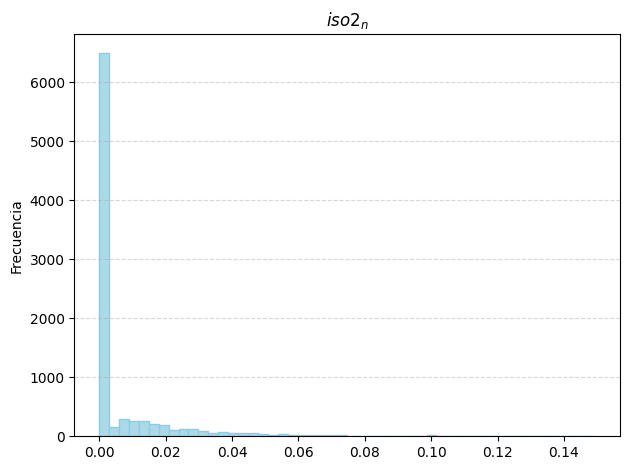

In [28]:
# Hacer histograma de iso1_n
plt.hist(df['iso1_n'], bins=50, align='mid', color='salmon', edgecolor='salmon')
plt.title(r'$iso1_n$')
plt.ylabel('Frecuencia')
#plt.xlim([-0.2, 0.2])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Hacer histograma de iso2_n
plt.hist(df['iso2_n'], align='mid', bins=50,  color='lightblue', edgecolor='skyblue')
plt.title(r'$iso2_{n}$')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [29]:

df[['Run', 'Event', 'dxy1', 'dxy2', 'iso1_n', 'iso2_n']]

,Run,Event,dxy1,dxy2,iso1_n,iso2_n
0,165617,74969122,-0.0745,0.0712,0.009138,0.099926
1,165617,75138253,-0.0554,0.0515,0.000000,0.000000
2,165617,75887636,0.0879,-0.0876,0.000000,0.000000
3,165617,75779415,0.0585,-0.0492,0.000000,0.000000
4,165617,75098104,-0.0305,0.0442,0.029734,0.000000
...,...,...,...,...,...,...
9994,173692,1244153861,0.0311,-0.0403,0.000000,0.007746
9996,173692,1244979327,0.0417,-0.0794,0.000000,0.000000
9997,173692,1245305163,0.0635,-0.0671,0.004955,0.025876
9998,173692,1245041468,0.0361,-0.0291,0.000000,0.000000


**3.3 Filtrado por Carga Total**

Ya vimos que los datos tienen carga de -1 y 1, por lo que al sumar la carga total vamos a tener solo 1 caso que nos interese: la carga total sea 0, de otro modo tendremos un zoo.

In [30]:
# Creamos la nuevo columa de Carga Total
df['QT'] = particles['Q1'] + particles['Q2']

# Contamos los "porcentajes de cada Carga"
df['QT'].value_counts()

# Hacemos el filtro para la Carga Total Neutra
df = df[(df['QT'] == 0)]

In [31]:
df['QT'].value_counts()

,count
QT,
0,8991


In [32]:
df.describe()

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2,iso1_n,iso2_n,QT
count,8991.000000,8.991000e+03,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.0
mean,168819.467690,4.032838e+08,39.652925,-0.230406,-0.237546,-0.036147,0.006849,0.266648,39.866088,0.024251,0.254435,0.036147,-0.007227,0.286268,0.007507,0.008012,0.0
std,3932.478363,3.496707e+08,13.305753,1.349122,1.802955,0.999402,0.060087,0.616862,13.617703,0.853289,1.789499,0.999402,0.060644,0.667335,0.018051,0.019144,0.0
min,160957.000000,8.922000e+04,6.841500,-2.437500,-3.141400,-1.000000,-0.106500,0.000000,3.266200,-2.428000,-3.141500,-1.000000,-0.130600,0.000000,0.000000,0.000000,0.0
25%,166033.000000,1.256675e+08,32.291200,-1.395300,-1.781050,-1.000000,-0.050850,0.000000,32.235000,-0.595100,-1.259850,-1.000000,-0.067550,0.000000,0.000000,0.000000,0.0
50%,167102.000000,3.218261e+08,39.739400,-0.426800,-0.438800,-1.000000,0.012500,0.000000,39.861600,0.024500,0.414600,1.000000,-0.013300,0.000000,0.000000,0.000000,0.0
75%,173381.000000,5.670026e+08,45.390450,1.129200,1.297250,1.000000,0.066750,0.266450,45.545500,0.671950,1.805800,1.000000,0.051600,0.288000,0.006445,0.007206,0.0
max,173692.000000,1.245305e+09,269.080000,2.099700,3.141400,1.000000,0.127400,6.184800,341.599000,2.098100,3.140900,1.000000,0.136000,9.088900,0.146823,0.149432,0.0


## 4.- Cálculo de la Masa Invariante

Sabemos que la expresión para nuestra masa invariante es

$M^2 = 2p_{T_1}p_{T_2} \left( \cosh \left( \eta_1 - \eta_2 \right) - \cos \left( \phi_1 - \phi_2 \right) \right) $

In [33]:
# Masa Invariante
df['M'] = np.sqrt( 2 * df['pt1'] * df['pt2'] * (np.cosh(df['eta1'] - df['eta2']) - np.cos(df['phi1'] - df['phi2'])))

#Masa Invariante Redondeada
df['M_r'] = np.round(df['M'])

df[['Run', 'Event', 'dxy1', 'dxy2', 'iso1_n', 'iso2_n',  'M_r']]

,Run,Event,dxy1,dxy2,iso1_n,iso2_n,M_r
0,165617,74969122,-0.0745,0.0712,0.009138,0.099926,90.0
1,165617,75138253,-0.0554,0.0515,0.000000,0.000000,89.0
2,165617,75887636,0.0879,-0.0876,0.000000,0.000000,88.0
3,165617,75779415,0.0585,-0.0492,0.000000,0.000000,90.0
4,165617,75098104,-0.0305,0.0442,0.029734,0.000000,91.0
...,...,...,...,...,...,...,...
9994,173692,1244153861,0.0311,-0.0403,0.000000,0.007746,90.0
9996,173692,1244979327,0.0417,-0.0794,0.000000,0.000000,92.0
9997,173692,1245305163,0.0635,-0.0671,0.004955,0.025876,88.0
9998,173692,1245041468,0.0361,-0.0291,0.000000,0.000000,91.0


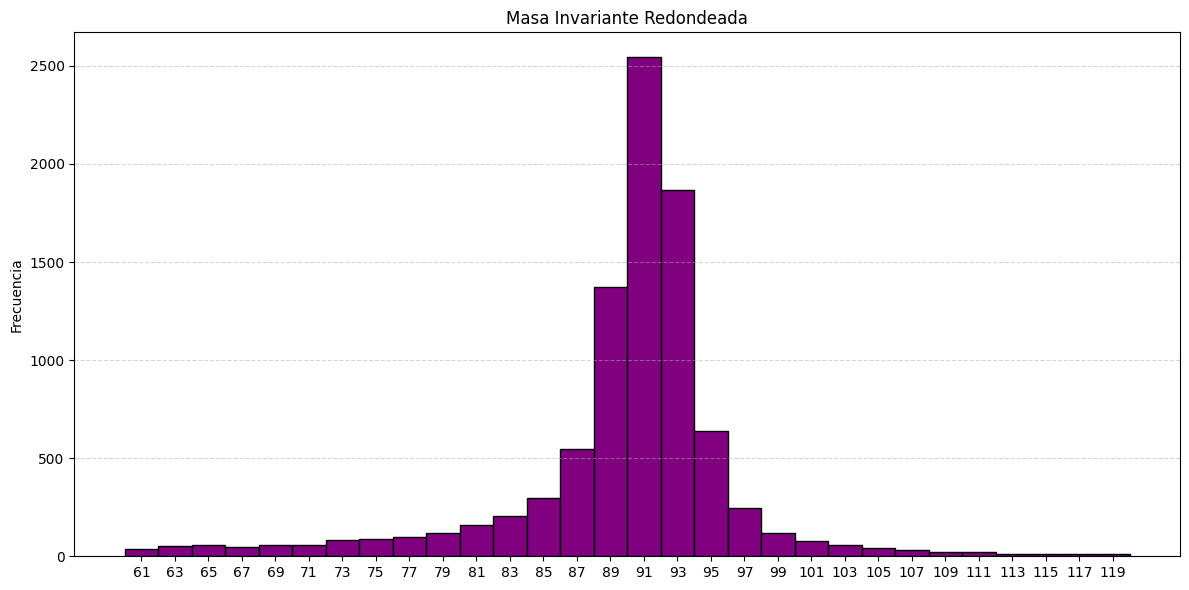

In [34]:
# Hacer histograma
plt.figure(figsize=(12, 6))
plt.hist(df['M_r'], list(range(60, 122, 2)) , align='mid', rwidth=2.5, color='purple', edgecolor='black')
plt.title(r'Masa Invariante Redondeada')
plt.ylabel('Frecuencia')
plt.xticks(list(range(61, 121, 2)))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

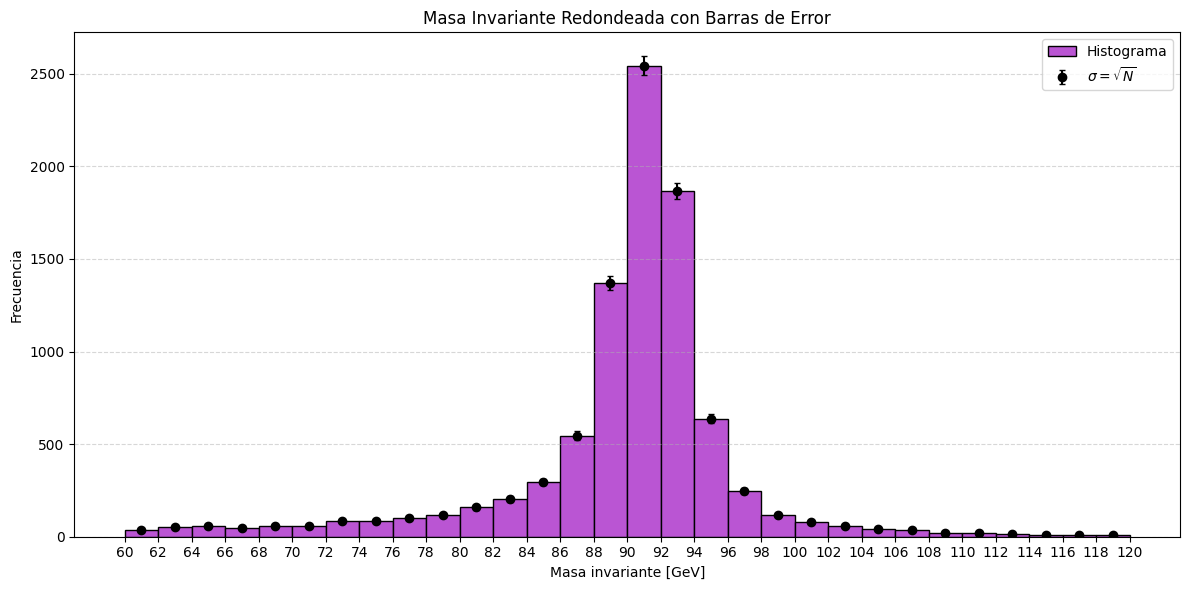

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Bins personalizados como lista
bin_edges = list(range(60, 122, 2))  # 60 a 120, paso 2

# 1. Calcular histograma
counts, _ = np.histogram(df['M_r'], bins=bin_edges)

# 2. Calcular centros de bin y errores
bin_centers = 0.5 * (np.array(bin_edges[1:]) + np.array(bin_edges[:-1]))
errors = np.sqrt(counts)  # incertidumbre tipo Poisson

# 3. Graficar histograma
plt.figure(figsize=(12, 6))
plt.hist(df['M_r'], bins=bin_edges, align='mid', rwidth=2.5,
         color='mediumorchid', edgecolor='black', label='Histograma')

# 4. Añadir barras de error
plt.errorbar(bin_centers, counts, yerr=errors, fmt='o',
             color='black', capsize=2, label=r'$\sigma = \sqrt{N}$')

# 5. Estética
plt.title('Masa Invariante Redondeada con Barras de Error')
plt.xlabel('Masa invariante [GeV]')
plt.ylabel('Frecuencia')
plt.xticks(list(range(60, 122, 2)))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
